# COVID-19: Raw Material Impact in the Coating Industry in Ecuador
by Rafael G Fernandez

---

In [3]:
# Dependencies and setup
import pandas as pd 
import numpy as np
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [4]:
# Reading files and store into Pandas data frame

file_one_df = pd.read_excel("Pinturas_Condor.xlsx")
file_two_df = pd.read_excel("Pinturas_Ecuatorianas.xlsx")
file_three_df= pd.read_excel("Pinturas_Unidas.xlsx")
covid_data_df=pd.read_csv("covid-data.csv")


In [30]:
# Reviewing the fist custom declaration 
file_one_df.head()

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem,Company
0,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,144,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,...,13520,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor
1,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,145,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,...,13520,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0,Condor
2,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,118,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,11450,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0,Condor
3,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,117,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,11450,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor
4,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00728681,0,27,2020-10-19,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,2220,NUEVA,1,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor


In [31]:
# Reviewing the second custom declaration 
file_two_df.head()

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem,Company
0,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00008131,0,1,2020-01-03,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,COMPAÃ‘IA MINERA AGREGADOS CALCAREOS S A,...,2880,NUEVA,0,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,CAOLIN PZ-600 MATERIA PRIMA COMACSA PZ-600,COMACSA,PZ-600, ,0.0,Ecuatorianas
1,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00060859,0,1,2020-01-23,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,QCI BRITANNIC,...,20,NUEVA,0,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,NEOGEN 2000 MATERIA PRIMA SIN MARCA 25000000564,SIN MARCA,25000000564, ,0.0,Ecuatorianas
2,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00060120,0,1,2020-01-23,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,COMPAÑIA MINERA AGREGADOS CALCAREOS S.A.,...,2880,NUEVA,3,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,CAOLIN PZ-600 MATERIA PRIMA COMACSA PZ-600,COMACSA,PZ-600, ,0.0,Ecuatorianas
3,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00085844,0,1,2020-01-31,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,COMPAÑIA MINERA AGREGADOS CALCAREOS S.A.,...,2880,NUEVA,3,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,CAOLIN PZ-600 MATERIA PRIMA COMACSA PZ-600,COMACSA,PZ-600, ,0.0,Ecuatorianas
4,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00131399,0,1,2020-02-19,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,KAMIN LLC,...,480,NUEVA,1,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,KAMIN MATERIA PRIMA KAMIN SIN MODELO,KAMIN,SIN MODELO, ,0.0,Ecuatorianas


In [32]:
# # Reviewing the third custom declaration 
file_three_df.head()

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem,Company
0,2505100000,ARENAS SILICEOUS AND QUARTZ SANDS,GQUIL - MARITIMO,028-2020-10-00250190,0,5,2020-04-17,990000689001,PINTURAS UNIDAS S.A.,ANDES CHEMICAL CORP,...,640,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,IMSIL SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
1,2505100000,ARENAS SILICEOUS AND QUARTZ SANDS,GQUIL - MARITIMO,028-2020-10-00711279,0,5,2020-10-12,990000689001,PINTURAS UNIDAS S.A.,ANDES CHEMICAL CORP,...,555,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,IMSIL SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
2,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00839830,0,1,2020-11-25,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,88,NUEVA,2,PRIETO VEGA LAURA MACLOVIA,SANTINTONE SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
3,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00839600,0,1,2020-11-25,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,1890,NUEVA,2,PRIETO VEGA LAURA MACLOVIA,SANTINTONE SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
4,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00840889,0,1,2020-11-25,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,1020,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,SANTINTONE SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas


In [33]:
# Data Analysis of Covid cases worldwide
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Week,Year
17725,ECU,South America,Ecuador,2020-03-01,6.0,6.0,NaN,NaN,NaN,NaN,...,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752,9,2020
17726,ECU,South America,Ecuador,2020-03-02,6.0,0.0,NaN,NaN,NaN,NaN,...,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752,10,2020
17727,ECU,South America,Ecuador,2020-03-03,7.0,1.0,NaN,NaN,NaN,NaN,...,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752,10,2020
17728,ECU,South America,Ecuador,2020-03-04,10.0,3.0,NaN,NaN,NaN,NaN,...,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752,10,2020
17729,ECU,South America,Ecuador,2020-03-05,13.0,3.0,NaN,NaN,NaN,NaN,...,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752,10,2020


In [9]:
# Creating data frames and preparing to merge

file_one_df['Company'] = 'Condor'
file_two_df['Company'] = 'Ecuatorianas'
file_three_df['Company'] = 'Unidas'


In [10]:
# Merging data frames into a single dataset

imports_df = pd.concat([file_one_df, file_two_df], axis=0)
imports_df = pd.concat([imports_df, file_three_df], axis=0)

In [47]:
# Reviewing merged data

imports_df

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem,Company,Week
0,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,144,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,...,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor,17
1,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,145,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,...,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0,Condor,17
2,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,118,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0,Condor,28
3,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,117,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor,28
4,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00728681,0,27,2020-10-19,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,NUEVA,1,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00270158,0,2,2020-04-28,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,HALOX Z PLEX SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas,18
681,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00494534,0,1,2020-07-28,990000689001,PINTURAS UNIDAS S.A.,PRODUCCIONES QUIMICAS S.A.,...,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,ESTEARATO DE ZINC SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas,31
682,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00066992,0,1,2020-01-27,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,HALOX FLASH X 150 SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas,5
683,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00066992,0,2,2020-01-27,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,HALOX Z PLEX 111 SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas,5


In [12]:
# Converting Date into weeks

imports_df['Date']=pd.to_datetime(imports_df['Date'])
imports_df['Week']=imports_df['Date'].dt.week
imports_df.groupby('Week')['Qty'].sum()
imports_df.groupby('Week')['U$ CFR Tot'].sum()

<ipython-input-12-f3dbae2e0636>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  imports_df['Week']=imports_df['Date'].dt.week


Week
1      278603.79
2      828032.09
3     1790706.01
4     1232525.32
5      680801.81
6     1084362.23
7      940039.59
8      662626.64
9     1063623.29
10     606629.07
11     762201.09
12      93297.74
13     420176.54
14     260001.54
15     743669.02
16     510526.46
17     649186.84
18     866686.49
19     351963.75
20    1032492.22
21     904051.98
22     290316.57
23     316817.80
24     183464.46
25     260033.77
26     144223.20
27      40864.14
28     636505.65
29     359062.88
30     126194.89
31     516184.01
32     569779.96
33     281248.20
34     340252.85
35     491506.80
36     620301.21
37     778747.93
38    1268366.78
39     510433.64
40    1022173.97
41     945604.34
42     965132.53
43    1510868.71
44     630831.66
45     922643.70
46    1867898.03
47     639215.90
48     997428.81
49     812118.63
50     934963.78
51    1521771.57
52     807929.11
53     714922.21
Name: U$ CFR Tot, dtype: float64

In [13]:
# Preparing a new data frame to merge with Covid-19 data

total_imports_df=imports_df.groupby('Week',as_index=False)[['U$ CFR Tot','Qty']].sum()

In [14]:
# Reviewing information

total_imports_df

,Week,U$ CFR Tot,Qty
0,1,278603.79,214535.03
1,2,828032.09,577859.31
2,3,1790706.01,1221904.03
3,4,1232525.32,1142984.30
4,5,680801.81,604874.89
5,6,1084362.23,630612.93
6,7,940039.59,539875.66
7,8,662626.64,537196.45
8,9,1063623.29,542044.13
9,10,606629.07,444577.04


In [15]:
covid_data_df[covid_data_df['location']=='Ecuador']
total_covid_df = covid_data_df[covid_data_df['location']=='Ecuador']
total_covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
17725,ECU,South America,Ecuador,3/1/2020,6.0,6.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17726,ECU,South America,Ecuador,3/2/2020,6.0,0.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17727,ECU,South America,Ecuador,3/3/2020,7.0,1.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17728,ECU,South America,Ecuador,3/4/2020,10.0,3.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17729,ECU,South America,Ecuador,3/5/2020,13.0,3.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18062,ECU,South America,Ecuador,2/1/2021,250986.0,158.0,1345.571,14890.0,31.0,35.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
18063,ECU,South America,Ecuador,2/2/2021,251279.0,293.0,1304.714,14915.0,25.0,35.286,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
18064,ECU,South America,Ecuador,2/3/2021,252390.0,1111.0,1265.000,14949.0,34.0,35.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
18065,ECU,South America,Ecuador,2/4/2021,253339.0,949.0,1048.429,14968.0,19.0,28.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752


In [16]:
covid_data_df['date']=pd.to_datetime(covid_data_df['date'])

In [17]:
covid_data_df['date'].max()

Timestamp('2021-02-05 00:00:00')

In [18]:
# covid_data_df[covid_data_df['date']<=pd.Timestamp(2020,12,31)]
#To erase

In [19]:
covid_data_df['date']=pd.to_datetime(covid_data_df['date'])
covid_data_df['Week']=covid_data_df['date'].dt.week
covid_data_df['Year']=covid_data_df['date'].dt.year

# only 2020 
covid_data_df = covid_data_df[covid_data_df["Year"] == 2020]

# only Ecuador
covid_data_df = covid_data_df[covid_data_df["location"] == "Ecuador"]


# covid_data_df.head(20)
# covid_data_df.groupby('Week')['new_cases'].sum()

total_covid_df=covid_data_df.groupby('Week',as_index=False)[['new_cases']].sum()
total_covid_df.head(53)

<ipython-input-19-2a26638346ae>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  covid_data_df['Week']=covid_data_df['date'].dt.week


,Week,new_cases
0,9,6.0
1,10,8.0
2,11,14.0
3,12,761.0
4,13,1135.0
5,14,1722.0
6,15,3820.0
7,16,2002.0
8,17,13251.0
9,18,6819.0


In [20]:
#total_unified_df 

# total_imports_df.merge(total_covid_df, how="outer", on='Week')

total_unified_df=pd.merge(
    total_imports_df,
    total_covid_df,
    how="outer",
    on="Week"
)

total_unified_df = total_unified_df.fillna(0)
total_unified_df.head()

,Week,U$ CFR Tot,Qty,new_cases
0,1,278603.79,214535.03,0.0
1,2,828032.09,577859.31,0.0
2,3,1790706.01,1221904.03,0.0
3,4,1232525.32,1142984.30,0.0
4,5,680801.81,604874.89,0.0


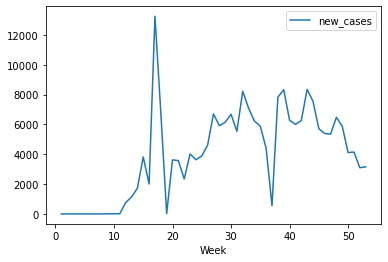

In [21]:
total_unified_df.plot.line(x='Week', y='new_cases')


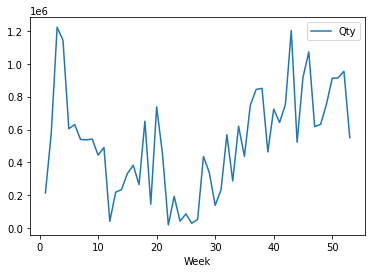

In [22]:
total_unified_df.plot.line(x='Week', y='Qty')
plt.legend()

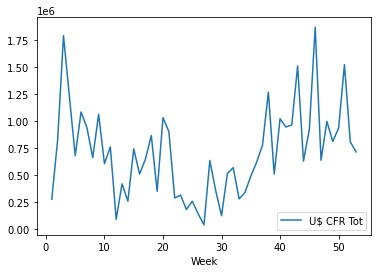

In [23]:
total_unified_df.plot.line(x='Week', y='U$ CFR Tot')


<AxesSubplot:label='6e5b3488-4383-4b5b-8a88-94958cdc0b8f', xlabel='Week'>

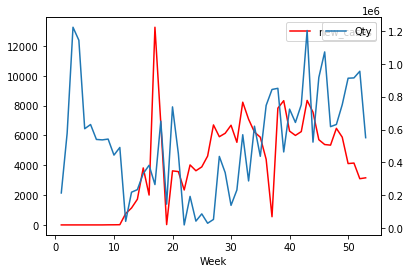

In [44]:
fig,ax = plt.subplots()
total_unified_df.plot.line(x='Week', y='new_cases',ax=ax,c='r')
ax2=plt.twinx()
total_unified_df.plot.line(x='Week', y='Qty',ax=ax2)


Text(0.5, 1.0, 'Covid-19 Cases vs USD Total Imports in Ecuador ')

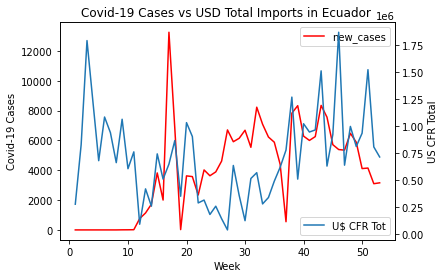

In [72]:
fig,ax = plt.subplots()
total_unified_df.plot.line(x='Week', y='new_cases',ax=ax,c='r')
ax2=plt.twinx()
total_unified_df.plot.line(x='Week', y='U$ CFR Tot',ax=ax2)
ax.set_ylabel("Covid-19 Cases")
ax2.set_ylabel("US CFR Total")
plt.title("Covid-19 Cases vs USD Total Imports in Ecuador ")

In [66]:
imports_df['Country of Origin'].value_counts


<bound method IndexOpsMixin.value_counts of 0             BRAZIL
1             BRAZIL
2             BRAZIL
3             BRAZIL
4             BRAZIL
           ...      
680    UNITED STATES
681         COLOMBIA
682    UNITED STATES
683    UNITED STATES
684         COLOMBIA
Name: Country of Origin, Length: 6539, dtype: object>